# Рекуррентная нейронная сеть
# Янн Александр

# LSTM

In [38]:
# Импорты
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.datasets import imdb
from keras.optimizers import Adam

# Устанавливаем seed для обеспечения повторяемости результатов
np.random.seed(42)

# Указываем количество слов из частотного словаря, которое будет использоваться (отсортированы по частоте использования)
max_features = 5000

# Загружаем данные (датасет IMDB содержит 25000 рецензий на фильмы с правильным ответом для обучения и 25000 рецензий на фильмы с правильным ответом для тестирования)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Устанавливаем максимальную длину рецензий в словах, чтобы они все были одной длины
maxlen = 80

# Заполняем короткие рецензии пробелами, а длинные обрезаем
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Создаем модель последовательной сети
model = Sequential()
# Добавляем слой для векторного представления слов (5000 слов, каждое представлено вектором из 32 чисел, отключаем входной сигнал с вероятностью 20% для предотвращения переобучения)
model.add(Embedding(max_features, 32))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
# Добавляем полносвязный слой из 1 элемента для классификации, в качестве функции активации будем использовать сигмоидальную функцию
model.add(Dense(1, activation='sigmoid'))

# Компилируем модель нейронной сети
model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Обучаем нейронную сеть (данные для обучения, ответы к данным для обучения, количество рецензий после анализа которого будут изменены веса, число эпох обучения, тестовые данные, показывать progress bar или нет)
model.fit(X_train, y_train,
          batch_size=64,
          epochs=7,
          validation_data=(X_test, y_test),
          verbose=1)

# Проверяем качество обучения на тестовых данных
scores = model.evaluate(X_test, y_test, batch_size=64)
print('Точность на тестовых данных: %.2f%%' % (scores[1] * 100))


Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 190ms/step - accuracy: 0.6753 - loss: 0.5746 - val_accuracy: 0.8229 - val_loss: 0.4016
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 77s 177ms/step - accuracy: 0.8439 - loss: 0.3635 - val_accuracy: 0.8216 - val_loss: 0.3954
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 87s 190ms/step - accuracy: 0.8691 - loss: 0.3226 - val_accuracy: 0.8227 - val_loss: 0.3971
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 181ms/step - accuracy: 0.8777 - loss: 0.3031 - val_accuracy: 0.8273 - val_loss: 0.4038
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 180ms/step - accuracy: 0.8808 - loss: 0.2995 - val_accuracy: 0.8294 - val_loss: 0.3936
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 190ms/step - accuracy: 0.8958 - loss: 0.2611 - val_accuracy: 0.8339 - val_loss: 0.3836
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 190ms/step - accuracy: 0.9007 - loss: 0.2543 - val_accuracy: 0.8323 - val_loss: 0.4090
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 47ms/step - accuracy: 0.8305 - loss: 0.4150
Точность на т

In [8]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 80, 32)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          53,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 639,905 (2.44 MB)

 Trainable params: 213,301 (833.21 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 426,604 (1.63 MB)

# Data

Количество отзывов в обучающем наборе: 25000
Количество отзывов в тестовом наборе: 25000


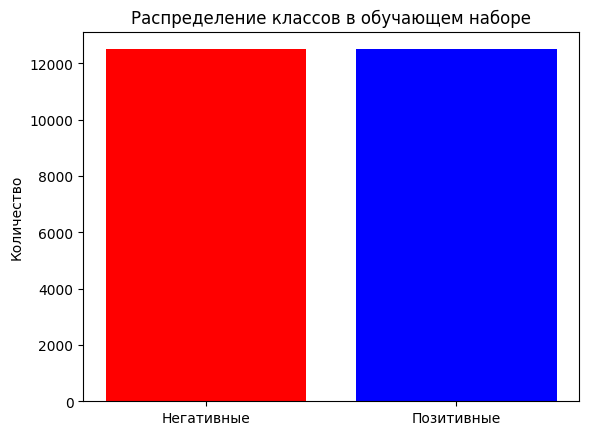

Пример негативного отзыва: off their ? ? that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music ? and ? taking away bodies and the ? still doesn't close for ? all ? aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then
Пример позитивного отзыва: that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story was so lovely because it was true and was someone's life after all that was ? with us all


In [23]:
# Количество отзывов
print("Количество отзывов в обучающем наборе:", len(X_train))
print("Количество отзывов в тестовом наборе:", len(X_test))

# Распределение классов
import matplotlib.pyplot as plt

# Распределение классов
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color=['red', 'blue'])
plt.title('Распределение классов в обучающем наборе')
plt.xticks([0, 1], ['Негативные', 'Позитивные'])
plt.ylabel('Количество')
plt.show()

# Примеры отзывов
# Словарь для преобразования индексов в слова
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(encoded_review):
    return " ".join([reverse_word_index.get(i - 3, "?") for i in encoded_review])

# Пример негативного отзыва
negative_review = decode_review(X_train[0]) if y_train[0] == 0 else decode_review(X_train[1])
print("Пример негативного отзыва:", negative_review)

# Пример позитивного отзыва
positive_review = decode_review(X_train[0]) if y_train[0] == 1 else decode_review(X_train[1])
print("Пример позитивного отзыва:", positive_review)


# Example

In [61]:
# Импортируем дополнительные библиотеки
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Получаем индекс слов IMDB, чтобы использовать его при токенизации
word_index = imdb.get_word_index()

# Инициализируем токенизатор с нашим количеством слов
tokenizer = Tokenizer(num_words=max_features)
tokenizer.word_index = word_index

def predict_review(text):
    # Переводим текст в числовую последовательность
    sequence = tokenizer.texts_to_sequences([text])
    # Заполняем или обрезаем последовательность до длины, которая была использована при обучении
    sequence = pad_sequences(sequence, maxlen=maxlen)
    # Делаем предсказание
    prediction = model.predict(sequence)
    # Интерпретируем результат
    if prediction > 0.5:
        print("Положительная рецензия с вероятностью {:.2f}%".format(prediction[0][0] * 100))
    else:
        print("Отрицательная рецензия с вероятностью {:.2f}%".format((1 - prediction[0][0]) * 100))

# Пример использования:
text_pos1 = "good movie"
text_pos2 = "i love this movie"
predict_review(text_pos1)
predict_review(text_pos2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Положительная рецензия с вероятностью 69.51%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Положительная рецензия с вероятностью 59.84%


In [54]:
import numpy as np

# Предсказываем лейблы для тестового набора
predictions = model.predict(X_test)

# Определяем количество примеров для вывода
num_examples = 10

# Функция для преобразования чисел в слова
index_to_word = {index: word for word, index in imdb.get_word_index().items()}
def decode_review(encoded_review):
    return " ".join([index_to_word.get(i - 3, "?") for i in encoded_review])

# Выводим несколько примеров с предсказанными и реальными лейблами
for i in range(num_examples):
    review = decode_review(X_test[i])
    predicted_label = int(predictions[i].round())  # Округляем до 0 или 1
    true_label = y_test[i]

    print(f"Отзыв: {review}")
    print(f"Настоящий лейбл: {true_label} ({'позитивный' if true_label == 1 else 'негативный'})")
    print(f"Предсказанный лейбл: {predicted_label} ({'позитивный' if predicted_label == 1 else 'негативный'})")
    print("\n" + "-"*50 + "\n")


782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step
Отзыв: ? ? ? ? ? ? ? ? ? ? ? ? ? please give this one a miss br br ? ? and the rest of the cast ? terrible performances the show is flat flat flat br br i don't know how michael ? could have allowed this one on his ? he almost seemed to know this wasn't going to work out and his performance was quite ? so all you ? fans give this a miss
Настоящий лейбл: 0 (негативный)
Предсказанный лейбл: 0 (негативный)

--------------------------------------------------

Отзыв: wonderfully written script br br i praise robert ? this is one of his many films that deals with ? fascinating subject matter this film is disturbing but it's sincere and it's sure to ? a strong emotional response from the viewer if you want to see an unusual film some might even say bizarre this is worth the time br br unfortunately it's very difficult to find in video ? you may have to buy it off the internet
Настоящий лейбл: 1 (позитивный)
Предсказанный лейбл: 1 (позитивный)

------

<ipython-input-54-119d60f17f5f>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_label = int(predictions[i].round())  # Округляем до 0 или 1


# SIMPLE RNN

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import Adam
# Создаем модель последовательной сети
modelRNN = Sequential()
# Добавляем слой для векторного представления слов
modelRNN.add(Embedding(max_features, 32))
# Добавляем классический RNN слой
modelRNN.add(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2))
# Добавляем полносвязный слой из 1 элемента для классификации, в качестве функции активации будем использовать сигмоидальную функцию
modelRNN.add(Dense(1, activation='sigmoid'))

# Компилируем модель нейронной сети
modelRNN.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Обучаем нейронную сеть
modelRNN.fit(X_train, y_train,
          batch_size=64,
          epochs=7,
          validation_data=(X_test, y_test),
          verbose=1)

# Проверяем качество обучения на тестовых данных
scores = modelRNN.evaluate(X_test, y_test, batch_size=64)
print('Точность на тестовых данных: %.2f%%' % (scores[1] * 100))

Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 60ms/step - accuracy: 0.5069 - loss: 0.7068 - val_accuracy: 0.4979 - val_loss: 0.6975
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.5328 - loss: 0.6897 - val_accuracy: 0.5374 - val_loss: 0.6821
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 72ms/step - accuracy: 0.5715 - loss: 0.6720 - val_accuracy: 0.5990 - val_loss: 0.6467
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 37s 63ms/step - accuracy: 0.6487 - loss: 0.6172 - val_accuracy: 0.6164 - val_loss: 0.6396
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 60ms/step - accuracy: 0.6885 - loss: 0.5775 - val_accuracy: 0.6400 - val_loss: 0.6279
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.7182 - loss: 0.5418 - val_accuracy: 0.7510 - val_loss: 0.5149
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 22s 56ms/step - accuracy: 0.7169 - loss: 0.5459 - val_accuracy: 0.6431 - val_loss: 0.6186
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6374 - loss: 0.6224
Точность на тестовых 

In [18]:
modelRNN.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 80, 32)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          13,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,205 (1.98 MB)

 Trainable params: 173,401 (677.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 346,804 (1.32 MB)

# GRU

In [27]:
# Импорты
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU
from tensorflow.keras.datasets import imdb
from tensorflow.keras.optimizers import Adam

# Устанавливаем seed для обеспечения повторяемости результатов
np.random.seed(42)

# Задаем параметры
max_features = 5000  # Используем топ-5000 слов
maxlen = 80  # Максимальная длина рецензий

# Загружаем данные
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

# Модель с GRU
modelGRU = Sequential()
modelGRU.add(Embedding(max_features, 32))
modelGRU.add(GRU(100, dropout=0.2, recurrent_dropout=0.2))
modelGRU.add(Dense(1, activation='sigmoid'))

modelGRU.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

modelGRU.fit(X_train, y_train, batch_size=64, epochs=7, validation_data=(X_test, y_test), verbose=1)

# Оценка модели
scores = modelGRU.evaluate(X_test, y_test, batch_size=64)
print('GRU - Точность на тестовых данных: %.2f%%' % (scores[1] * 100))


Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 196ms/step - accuracy: 0.6159 - loss: 12.2620 - val_accuracy: 0.6905 - val_loss: 0.5834
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 74s 191ms/step - accuracy: 0.7719 - loss: 0.4931 - val_accuracy: 0.7216 - val_loss: 0.5417
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 205ms/step - accuracy: 0.8219 - loss: 0.4050 - val_accuracy: 0.7276 - val_loss: 0.5348
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 204ms/step - accuracy: 0.8342 - loss: 0.3779 - val_accuracy: 0.7249 - val_loss: 0.5318
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 201ms/step - accuracy: 0.8433 - loss: 0.3551 - val_accuracy: 0.7279 - val_loss: 0.5325
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 203ms/step - accuracy: 0.8553 - loss: 0.3324 - val_accuracy: 0.7272 - val_loss: 0.5349
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 204ms/step - accuracy: 0.8422 - loss: 0.3960 - val_accuracy: 0.7215 - val_loss: 0.5421
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.7195 - loss: 0.5482
GRU - Точнос

In [29]:
modelGRU.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 80, 32)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 100)                 │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 600,905 (2.29 MB)

 Trainable params: 200,301 (782.43 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 400,604 (1.53 MB)

# BI RNN

In [28]:
from tensorflow.keras.layers import SimpleRNN, Bidirectional

# Модель с двунаправленным RNN
modelBiRNN = Sequential()
modelBiRNN.add(Embedding(max_features, 32))
modelBiRNN.add(Bidirectional(SimpleRNN(100, dropout=0.2, recurrent_dropout=0.2)))
modelBiRNN.add(Dense(1, activation='sigmoid'))

modelBiRNN.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

modelBiRNN.fit(X_train, y_train, batch_size=64, epochs=7, validation_data=(X_test, y_test), verbose=1)

# Оценка модели
scores = modelBiRNN.evaluate(X_test, y_test, batch_size=64)
print('Bidirectional RNN - Точность на тестовых данных: %.2f%%' % (scores[1] * 100))


Epoch 1/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 44s 99ms/step - accuracy: 0.4967 - loss: 0.7121 - val_accuracy: 0.5238 - val_loss: 0.6920
Epoch 2/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 101ms/step - accuracy: 0.5132 - loss: 0.6967 - val_accuracy: 0.5450 - val_loss: 0.6887
Epoch 3/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 106ms/step - accuracy: 0.5339 - loss: 0.6898 - val_accuracy: 0.5580 - val_loss: 0.6809
Epoch 4/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 101ms/step - accuracy: 0.5915 - loss: 0.6654 - val_accuracy: 0.6043 - val_loss: 0.6418
Epoch 5/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 101ms/step - accuracy: 0.6702 - loss: 0.6010 - val_accuracy: 0.6981 - val_loss: 0.5720
Epoch 6/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 108ms/step - accuracy: 0.7270 - loss: 0.5357 - val_accuracy: 0.6995 - val_loss: 0.5669
Epoch 7/7
391/391 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.7577 - loss: 0.4994 - val_accuracy: 0.6556 - val_loss: 0.6117
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.6520 - loss: 0.6170
Bidirectional RN

In [30]:
modelBiRNN.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)              │ (None, 80, 32)              │         160,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 200)                 │          26,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 560,405 (2.14 MB)

 Trainable params: 186,801 (729.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 373,604 (1.43 MB)